<a href="https://colab.research.google.com/github/Kausarfatima186/PRODIGY_DS_05/blob/main/US_road_accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the us-accidents dataset directly from kaggle as it is a huge file

In [1]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot create regular file '/root/.kaggle/': Not a directory


In [2]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
License(s): CC-BY-NC-SA-4.0
 99% 644M/653M [00:04<00:00, 69.6MB/s]
100% 653M/653M [00:04<00:00, 149MB/s] 


In [3]:
!unzip /content/us-accidents.zip -d /content/

Archive:  /content/us-accidents.zip
  inflating: /content/US_Accidents_March23.csv  


Importing necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset

In [5]:
file_path = "/content/US_Accidents_March23.csv"

chunk_size = 1000


chunks = []
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Append the processed chunk to the list
    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
full_df = pd.concat(chunks, ignore_index=True)

Exploring the dataset

In [6]:
full_df.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
full_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [9]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

Checking the Length of Number of Columns and rows

In [8]:
print("Number of columns: ",len(full_df.columns))
print("Number of rows: ",len(full_df))

Number of columns:  46
Number of rows:  7728394


In [10]:
full_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


 checking the number of numeric columns in our data

In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = full_df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

Checking the number of null values per column

In [13]:
full_df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

Percentage of missing values per column

In [14]:
missing_percentage = full_df.isna().sum().sort_values(ascending = False) / len(full_df) * 100
missing_percentage

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

Get only those columns which has null values

In [15]:
missing_percentage[missing_percentage !=0]

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
dtype: float64

Barplot to See in the missing values in the form of plot

<Axes: >

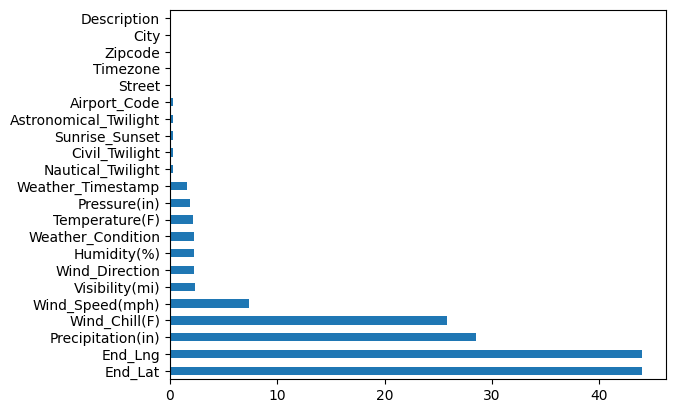

In [16]:
missing_percentage[missing_percentage !=0].plot(kind="barh")

Remove the columns that are looking unnecessary for our data

Exploratory Analysis and Data Visualization
Columns we'll Analyze

City,
Start Time,
Start Lng, Start Lat,
Temperature,
Weather Condition

In [17]:
full_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

city

In [18]:
cities = full_df.City.unique()
len(cities)

13679

In [19]:
cities_by_accident = full_df.City.value_counts()
cities_by_accident

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [20]:
cities_by_accident[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

In [22]:
"New York" in full_df.City

False

In [23]:
"NY" in full_df.State

False

<Axes: ylabel='City'>

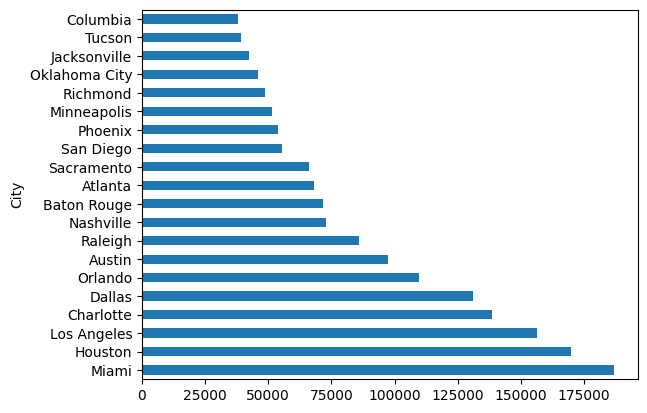

In [24]:
cities_by_accident[:20].plot(kind="barh")

In [25]:
import seaborn as sns
sns.set_style("darkgrid")

<ipython-input-26-1f460903cad6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accident)


<Axes: xlabel='count', ylabel='Density'>

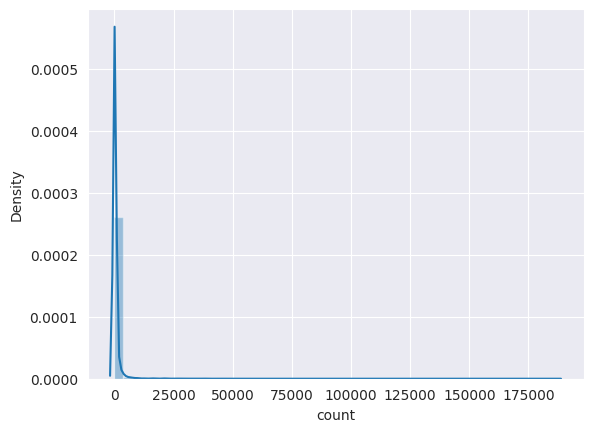

In [26]:
sns.distplot(cities_by_accident)

In [27]:
highest_cities_accident= cities_by_accident[cities_by_accident >=1000]
len(highest_cities_accident)

1218

<ipython-input-28-7474f6ebaf20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(highest_cities_accident)


<Axes: xlabel='count', ylabel='Density'>

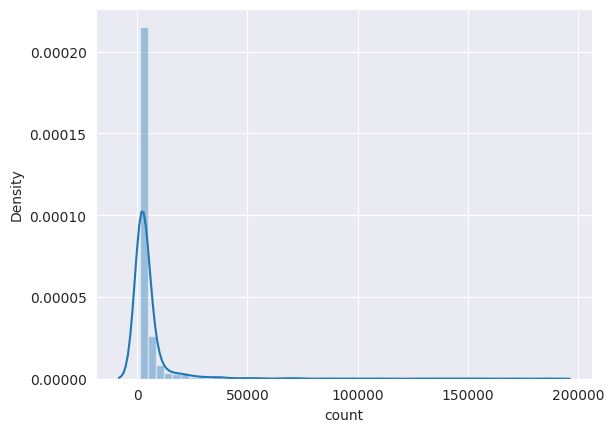

In [28]:
sns.distplot(highest_cities_accident)

In [29]:
len(highest_cities_accident) / len(cities)

0.08904159660793917

In [30]:
lowest_cities_accident= cities_by_accident[cities_by_accident <1000]
len(lowest_cities_accident)

12460

<ipython-input-31-9e4e16d19c73>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lowest_cities_accident)


<Axes: xlabel='count', ylabel='Density'>

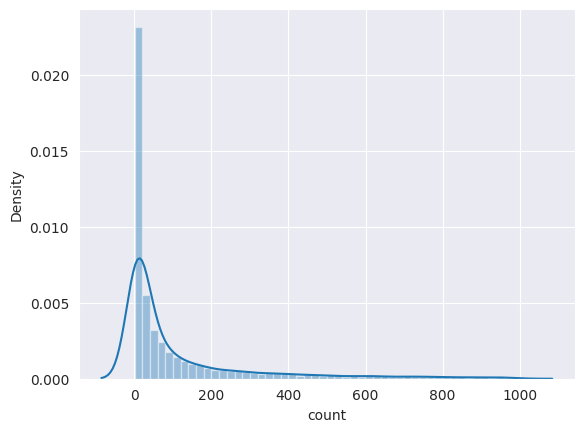

In [31]:
sns.distplot(lowest_cities_accident)

In [32]:
len(lowest_cities_accident) / len(cities)

0.910885298632941

<Axes: xlabel='count', ylabel='Count'>

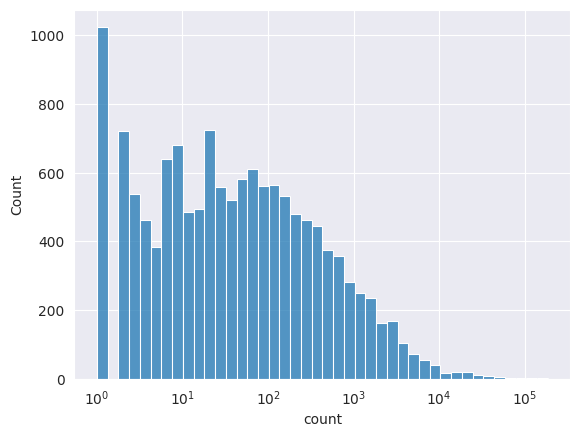

In [33]:
sns.histplot(cities_by_accident , log_scale=True)

In [34]:
cities_by_accident[cities_by_accident ==1]

City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

Start time

In [35]:
full_df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

As we see the datatype of this column is "object". So converting it to datetime format

In [36]:
full_df['Start_Time'] = pd.to_datetime(full_df['Start_Time'], errors='coerce')

Now , We can easily see the Timestamp

In [37]:
full_df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

<ipython-input-38-4520344525d4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full_df.Start_Time.dt.hour , bins =24 , norm_hist=True ,kde= False)


<Axes: xlabel='Start_Time'>

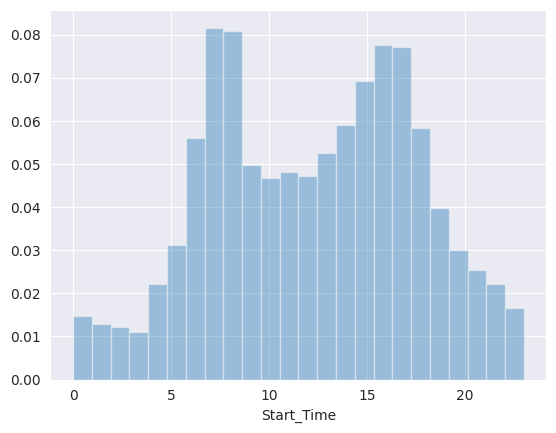

In [38]:
sns.distplot(full_df.Start_Time.dt.hour , bins =24 , norm_hist=True ,kde= False)


A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work)
Next higest percentage is 3 pm to 6 pm.

<ipython-input-39-93010ad24df4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full_df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

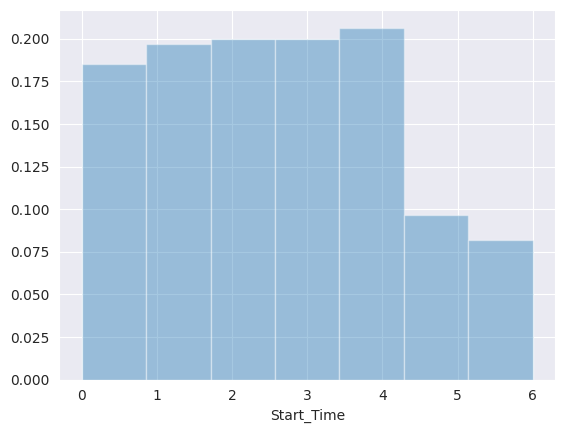

In [39]:
sns.distplot(full_df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

Is the distribution of accidents by hour the same on weekends as on weekdays.

<ipython-input-40-5f0307fa79fb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

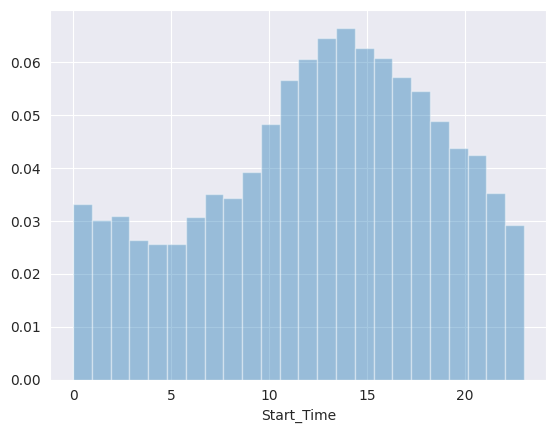

In [40]:
sundays_start_time = full_df.Start_Time[full_df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

Most of Accident on the 6th Day of week is from 9am to 6pm

<ipython-input-41-7c01ededd19f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

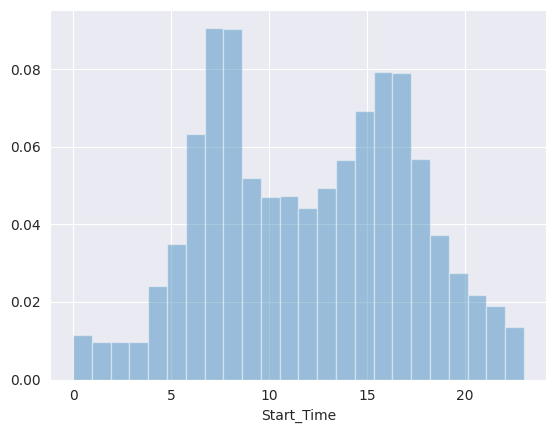

In [41]:
monday_start_time = full_df.Start_Time[full_df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

On Sundays, the peak occurs between 10 am and 3 pm, unlike weekdays

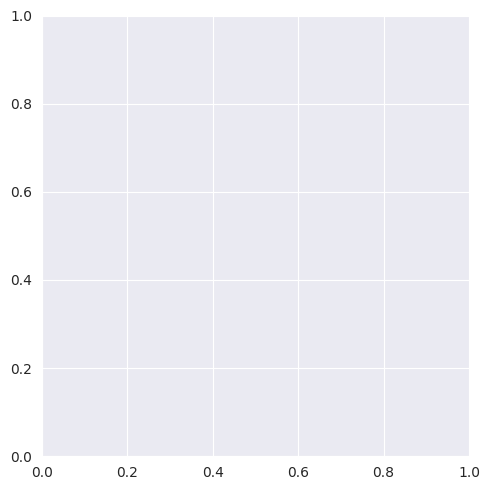

In [42]:
df_2019 = full_df[full_df.Start_Time.dt.year == 2019]
df_2019_Bing = df_2019[df_2019.Source == 'MapQuest']
sns.displot(df_2019_Bing.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

<Axes: ylabel='count'>

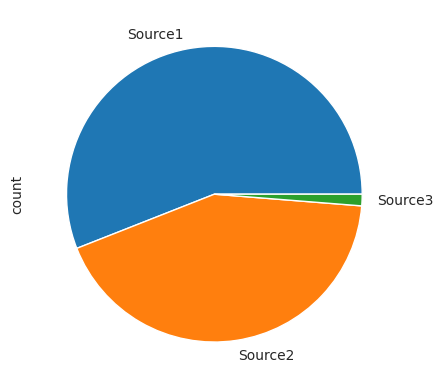

In [43]:
full_df.Source.value_counts().plot(kind='pie')

Start Latitide and Longitude

In [44]:
full_df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [45]:
full_df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

In [46]:
sample_df = full_df.sample(int(0.1 *len(full_df)))

Reduce the DF Size to 1% ,just because there is a lot of points in the dataset

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

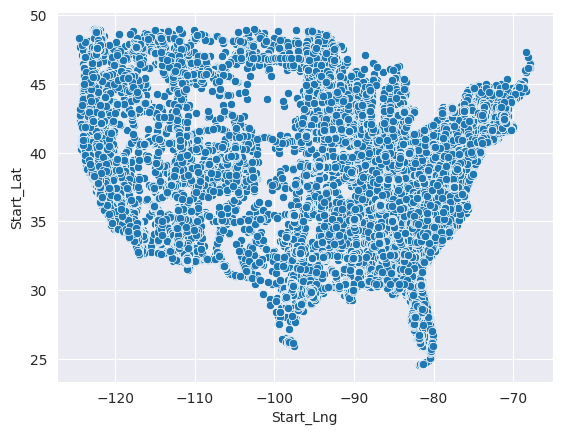

In [47]:
sns.scatterplot(x=sample_df.Start_Lng,y= sample_df.Start_Lat)

In [48]:
import folium

In [49]:
lat, lon = full_df.Start_Lat[0],full_df.Start_Lng[0]
lat, lon

(39.865147, -84.058723)

In [53]:
for x in full_df[['Start_Lat', 'Start_Lng']].sample(100).items():
    print(x[1])

4856088    37.329225
5657145    34.852702
6471328    40.101395
3706575    36.843483
3802036    36.825474
             ...    
4482140    43.335845
556134     41.566971
3190613    36.096485
2566917    30.354076
403507     33.966537
Name: Start_Lat, Length: 100, dtype: float64
4856088    -76.705267
5657145    -82.275882
6471328    -75.099438
3706575    -76.167859
3802036   -119.679100
              ...    
4482140    -83.738173
556134     -81.557510
3190613    -79.996109
2566917    -81.552643
403507    -118.256409
Name: Start_Lng, Length: 100, dtype: float64


In [54]:
zip(list(full_df.Start_Lat), list(full_df.Start_Lng))

In [55]:
from folium.plugins import HeatMap

In [56]:
sample_df = full_df.sample(int(0.001 * len(full_df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [57]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

weather

In [58]:
full_df['Visibility(mi)']

0          10.0
1          10.0
2          10.0
3           9.0
4           6.0
           ... 
7728389    10.0
7728390    10.0
7728391    10.0
7728392    10.0
7728393     7.0
Name: Visibility(mi), Length: 7728394, dtype: float64

In [59]:
full_df['Visibility(mi)'].value_counts()

Visibility(mi)
10.0     6070231
7.0       217027
9.0       188529
8.0       149975
5.0       144153
          ...   
78.0           1
101.0          1
72.0           1
67.0           1
43.0           1
Name: count, Length: 92, dtype: int64

data when severity is high and visibility is moderate

In [60]:
full_df[(full_df.Severity == 4) & (full_df['Visibility(mi)'] <=10)]

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
619,A-620,Source2,4,2016-03-11 13:18:48,2016-03-11 13:48:48,39.917412,-83.014236,NaN,NaN,0.010,...,False,False,False,False,False,False,Day,Day,Day,Day
1197,A-1198,Source2,4,2016-06-24 22:28:49,2016-06-24 22:58:49,37.321117,-121.899887,NaN,NaN,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
1901,A-1902,Source2,4,2016-07-01 14:09:13,2016-07-01 14:39:13,37.630623,-122.435043,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
4143,A-4144,Source2,4,2016-07-25 14:23:33,2016-07-25 15:11:13,37.339115,-121.851807,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
4964,A-4965,Source2,4,2016-08-01 07:44:37,2016-08-01 08:29:37,37.710648,-122.166687,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728354,A-7777722,Source1,4,2019-08-23 17:25:12,2019-08-23 17:54:00,38.995930,-121.672020,39.00317,-121.662679,0.708,...,False,False,False,False,False,False,Day,Day,Day,Day
7728355,A-7777723,Source1,4,2019-08-23 17:25:12,2019-08-23 17:54:00,39.003170,-121.662679,38.99593,-121.672020,0.708,...,False,False,False,False,False,False,Day,Day,Day,Day
7728366,A-7777734,Source1,4,2019-08-23 13:39:48,2019-08-23 14:05:33,33.685990,-117.886260,33.68537,-117.885720,0.053,...,False,False,False,False,False,False,Day,Day,Day,Day
7728367,A-7777735,Source1,4,2019-08-23 13:39:48,2019-08-23 14:05:33,33.687300,-117.890190,33.68599,-117.886260,0.243,...,False,False,False,False,False,False,Day,Day,Day,Day


 total percentage of accidents in which visibility was less than 2 miles

In [61]:
(len(full_df[full_df['Visibility(mi)'] <=2]) / len(full_df) )* 100.

4.760109280142808

total percentage of accidents in which visibility was less than 2 miles and severity was very high

In [62]:
(len(full_df[(full_df['Visibility(mi)'] <=2) & (full_df['Severity'] ==4)]) / len(full_df) ) * 100.

0.1428627991792344

In [63]:
weather = full_df.Weather_Condition.value_counts()

 Kind of weather when no. of accidents were greater than 1000

In [64]:
weather[weather > 1000]

Weather_Condition
Fair                            2560802
Mostly Cloudy                   1016195
Cloudy                           817082
Clear                            808743
Partly Cloudy                    698972
Overcast                         382866
Light Rain                       352957
Scattered Clouds                 204829
Light Snow                       128680
Fog                               99238
Rain                              84331
Haze                              76223
Fair / Windy                      35671
Heavy Rain                        32309
Light Drizzle                     22684
Thunder in the Vicinity           17611
Cloudy / Windy                    17035
T-Storm                           16810
Mostly Cloudy / Windy             16508
Snow                              15537
Thunder                           14202
Light Rain with Thunder           13597
Smoke                             12668
Wintry Mix                        11703
Partly Cloudy / Windy 

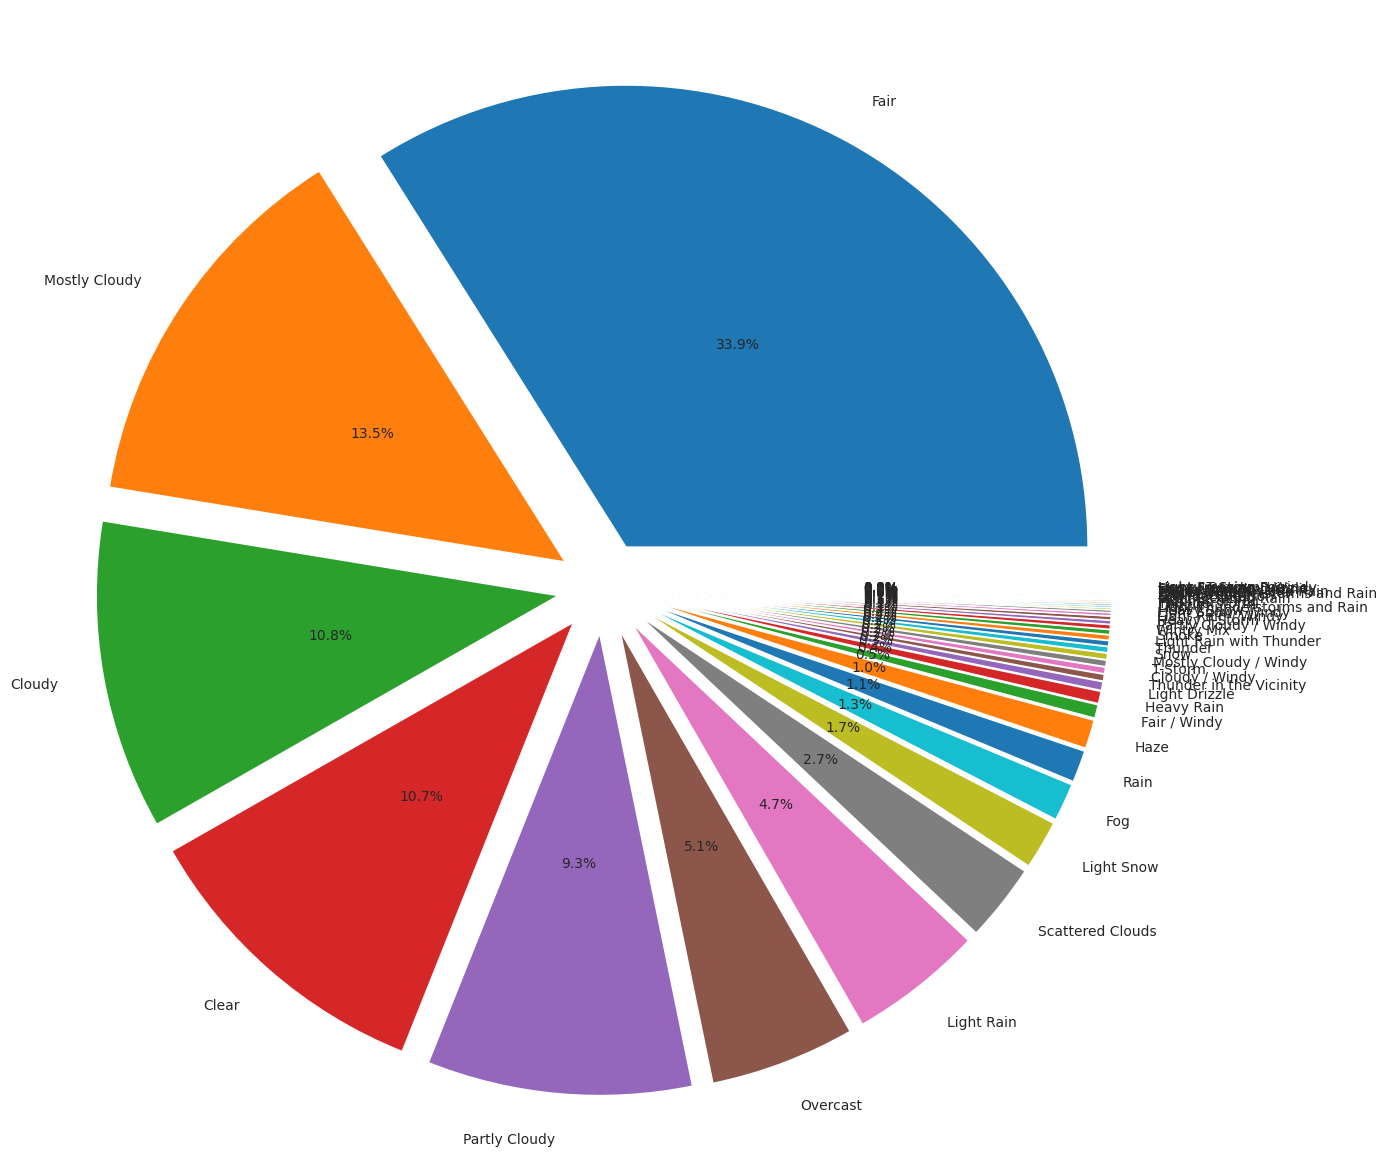

In [65]:
pie, ax = plt.subplots(figsize=[15,15])
labels = weather[weather > 1000].keys()
plt.pie(x=weather[weather > 1000], autopct="%.1f%%", explode=[0.1]*len(weather[weather > 1000]), labels=labels, pctdistance=0.5)
plt.show();

Summary and Conclusion
Insights:


No Data from New York


The Number of accidents per city decreases exponentialy


Less than 9% Cities have more than 1000 Accidents Yearly